![stars-header](./visuals/stars_header.png)

# Executive Summary



### Dataset

You can acqiure the dataset [here](https://www.kaggle.com/brsdincer/star-type-classification).

https://en.wikipedia.org/wiki/Luminosity
https://en.wikipedia.org/wiki/Magnitude_(astronomy)
https://en.wikipedia.org/wiki/Absolute_magnitude
https://scienceruls.weebly.com/spectral-class.html


### Data Dictionary

| Feature | Description |
| :--- | :--- |
| Temperature | Temperature in degrees Kelvin |
| Relative Luminosity | Luminosity $\div$ Average Luminosity of the Sun|
| Relative Radius | Radius $\div$ Average Radius of the Sun|
| Absolute Magnitude |  |
| Color | General Color of Spectrum |
| Spectral Class | O,B,A,F,G,K,M / SMASS|

| Target: __Type__ | Description |
| :--- | :--- |
| 0 | Red Dwarf | 
| 1 | Brown Dwarf | 
| 2 | White Dwarf | 
| 3 | Main Sequence | 
| 4 | Super Giants | 
| 5 | Hyper Giants | 

MATH:

    Lo = 3.828 x 10^26 Watts
    (Avg Luminosity of Sun)

    Ro = 6.9551 x 10^8 m
    (Avg Radius of Sun)

In [1]:
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set plotting defaults
sns.set(context='talk')

# Import preprocessing libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report

# Acquire

In [2]:
# Read in the file named `stars.csv` from the data folder
df = pd.read_csv('./data/stars.csv')

In [3]:
# Display the first 5 rows
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
# Display the last 2 rows
df.tail(2)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
238,9235,404940.0,1112.0,-11.23,White,A,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


In [5]:
# Display the column names, # of non-null observations, and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


#### Info Observations

In [6]:
# Display the unique values in each column
df.nunique()

Temperature       228
L                 208
R                 216
A_M               228
Color              17
Spectral_Class      7
Type                6
dtype: int64

#### Distinct Count Observations

In [7]:
# Display Summary Statistics of the numeric columns
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


#### Summary Statistics Oberservations

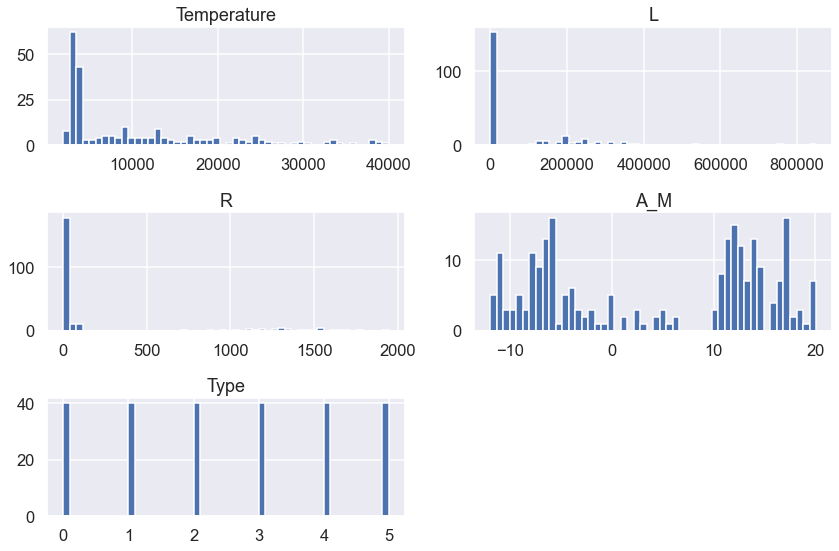

In [8]:
# Display the spread of each feature as a histogram
df.hist(figsize=(12, 8), bins=50)
plt.tight_layout();

# Prepare

1. Lowercase column names
2. Convert the datatype of the `spectral_class`, and `color` columns to "Category"
3. Clean and normalize the text in the `color` column.

In [9]:
# Lowercase the column names
df.columns = [column.lower() for column in df.columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature     240 non-null    int64  
 1   l               240 non-null    float64
 2   r               240 non-null    float64
 3   a_m             240 non-null    float64
 4   color           240 non-null    object 
 5   spectral_class  240 non-null    object 
 6   type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### Rename columns with explicit names

In [11]:
df.rename(columns={'l':'luminosity',
                   'r':'radius',
                   'a_m':'absolute_magnitude',
                   'type': 'star_type'},
         inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         240 non-null    int64  
 1   luminosity          240 non-null    float64
 2   radius              240 non-null    float64
 3   absolute_magnitude  240 non-null    float64
 4   color               240 non-null    object 
 5   spectral_class      240 non-null    object 
 6   star_type           240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### Map Target Names

In [13]:
star_type_map = {0: 'Red Dwarf',
                 1:'Brown Dwarf',
                 2:'White Dwarf',
                 3:'Main Sequence',
                 4:'Super Giants',
                 5:'Hyper Giants'} 

In [14]:
df['star_type_name'] = df['star_type'].map(star_type_map)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         240 non-null    int64  
 1   luminosity          240 non-null    float64
 2   radius              240 non-null    float64
 3   absolute_magnitude  240 non-null    float64
 4   color               240 non-null    object 
 5   spectral_class      240 non-null    object 
 6   star_type           240 non-null    int64  
 7   star_type_name      240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


### Text Normalization

In [16]:
# Display the values of the `color` column to plan the text normalization process.
df.color.value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
Orange                  2
Whitish                 2
yellowish               2
White-Yellow            1
Pale yellow orange      1
Orange-Red              1
Blue-White              1
Yellowish               1
Name: color, dtype: int64

In [17]:
# Lowercase all color names
df.color = df.color.apply(str.lower)

In [18]:
# Remove the hyphen from all color names
df.color = df.color.str.replace('-', ' ')

In [19]:
# Replace redundant color names with normalized version.
df.replace({'color':{'yellowish white': 'yellow white',
                     'white yellow': 'yellow white'}}, inplace=True)

In [20]:
# Display the color names with the # of observations.
df.color.value_counts()

red                   112
blue                   56
blue white             41
yellow white           12
white                  10
yellowish               3
whitish                 2
orange                  2
orange red              1
pale yellow orange      1
Name: color, dtype: int64

### Categorical Values

In [21]:
# Create categorized versions of the column names.
df[['spectral_class', 'color']] = df[['spectral_class', 'color']].apply(pd.Categorical)

In [22]:
# Check the column names and the data types of the 3 columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   temperature         240 non-null    int64   
 1   luminosity          240 non-null    float64 
 2   radius              240 non-null    float64 
 3   absolute_magnitude  240 non-null    float64 
 4   color               240 non-null    category
 5   spectral_class      240 non-null    category
 6   star_type           240 non-null    int64   
 7   star_type_name      240 non-null    object  
dtypes: category(2), float64(3), int64(2), object(1)
memory usage: 12.6+ KB


### Factorization: Encoding strings with unique numeric indentifiers

In [23]:
# Create a list of column names that have an object/string data type
object_column_names = ['spectral_class', 'color']

In [24]:
# Create a factorized version of each object column.
for column in object_column_names:
    df[f'{column}_num'], _ = pd.factorize(df[column]) 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   temperature         240 non-null    int64   
 1   luminosity          240 non-null    float64 
 2   radius              240 non-null    float64 
 3   absolute_magnitude  240 non-null    float64 
 4   color               240 non-null    category
 5   spectral_class      240 non-null    category
 6   star_type           240 non-null    int64   
 7   star_type_name      240 non-null    object  
 8   spectral_class_num  240 non-null    int64   
 9   color_num           240 non-null    int64   
dtypes: category(2), float64(3), int64(4), object(1)
memory usage: 16.3+ KB


### Rearrange column names

In [26]:
df = df[['temperature', 'luminosity', 'radius',
         'absolute_magnitude', 'color', 'spectral_class',
         'spectral_class_num', 'color_num', 'star_type_name', 'star_type']]

### Create the train, validate, and test datasets

In [27]:
# Split the dataset into train, and validation + test sets
train, validate_test = train_test_split(df,
                                        test_size=.50,
                                        random_state=369,
                                        stratify=df['star_type'])

# Split validate_test portion into validate and test sets
validate, test = train_test_split(validate_test,
                                  test_size=0.25,
                                  random_state=369,
                                  stratify=validate_test['star_type'])

In [28]:
train.shape

(120, 10)

In [29]:
train['star_type'].value_counts()

0    20
1    20
2    20
3    20
4    20
5    20
Name: star_type, dtype: int64

In [30]:
validate['star_type'].value_counts()

0    15
1    15
2    15
3    15
4    15
5    15
Name: star_type, dtype: int64

In [31]:
test['star_type'].value_counts()

0    5
1    5
2    5
3    5
4    5
5    5
Name: star_type, dtype: int64

# Exploration

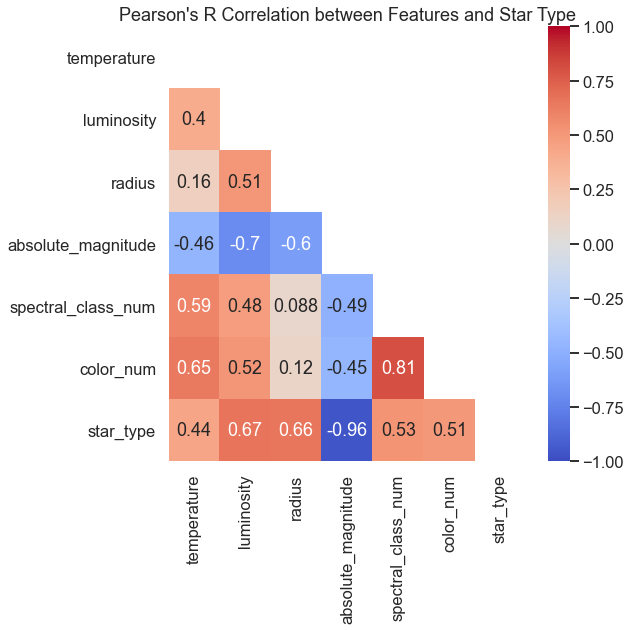

In [32]:
sns.set_context('talk')

correlations = train.corr()

mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(correlations,
                     annot=True,
                     cmap='coolwarm',
                     vmin=-1,
                     vmax=1,
                     mask=mask)
    
    plt.title("Pearson's R Correlation between Features and Star Type")
    plt.show()

#### Observations

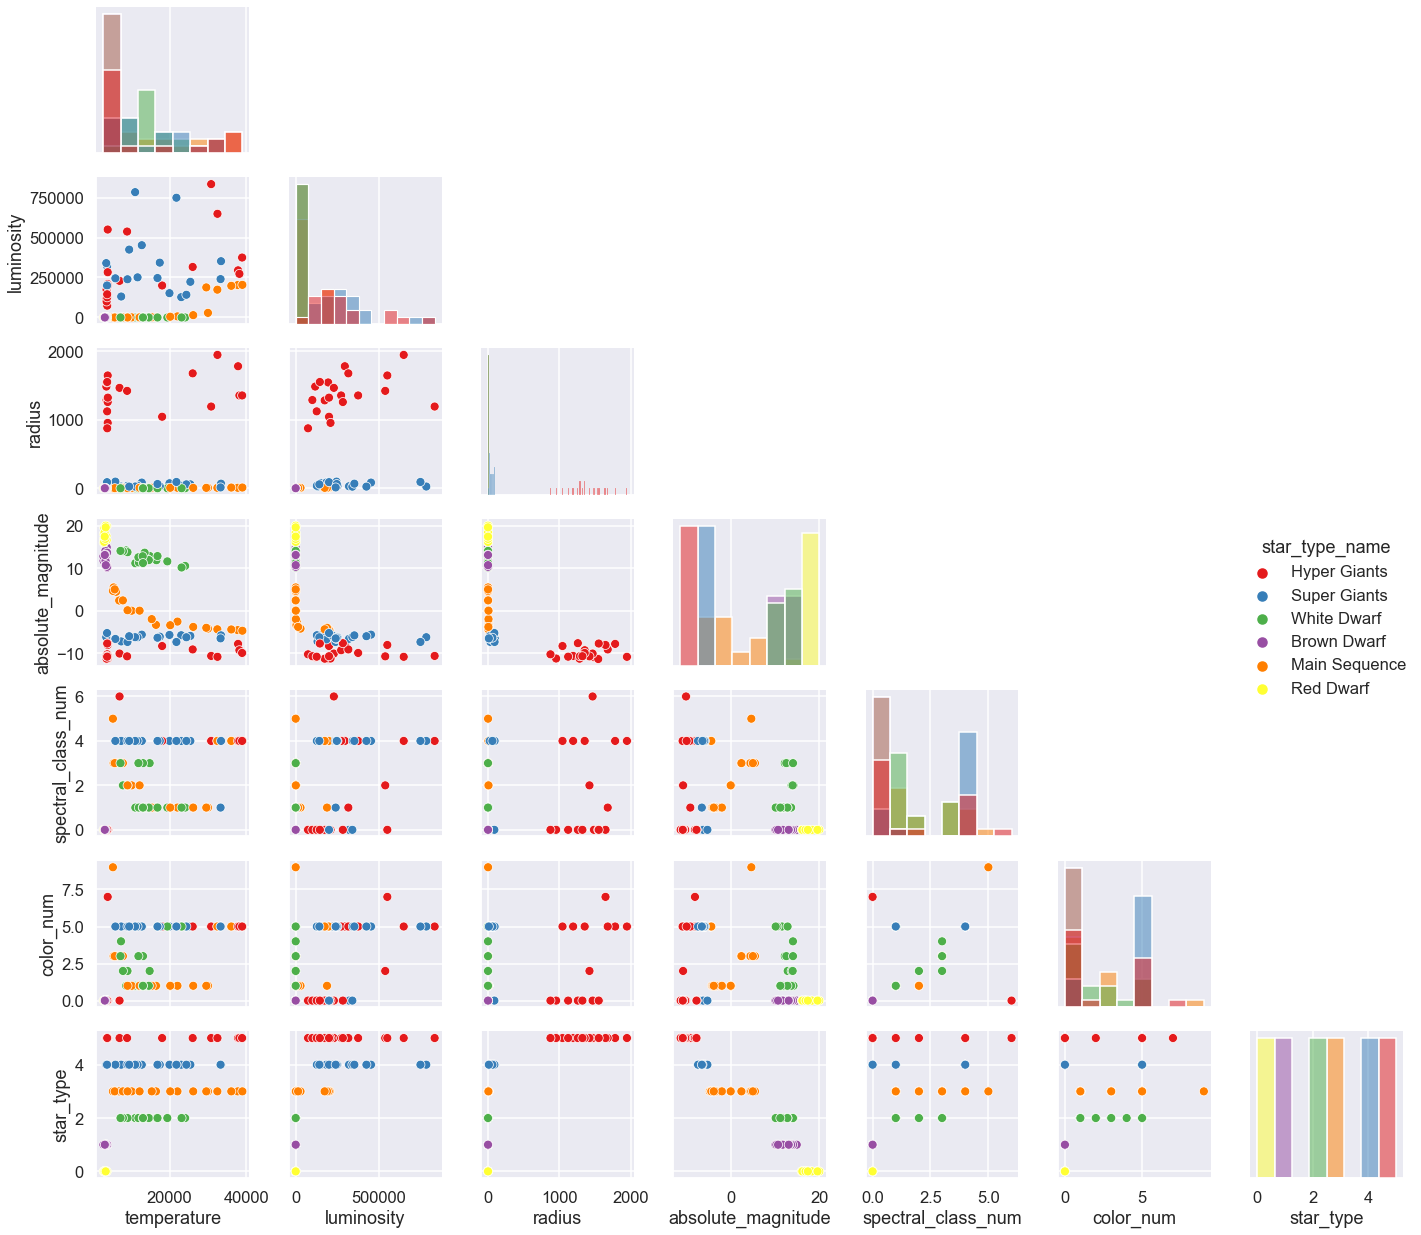

In [33]:
sns.pairplot(data=train,
             hue='star_type_name',
             palette='Set1',
             corner=True,
             diag_kind='hist')

plt.tight_layout();

### 3-Dimensional Scatter Plot of Most Visually Separable Variables

In [34]:
star_names = train['star_type_name'].unique()
markers = ['p','*','h','D','P','X']
marker_color = ['blue', 'green', 'red', 'orange', 'yellow', 'purple']

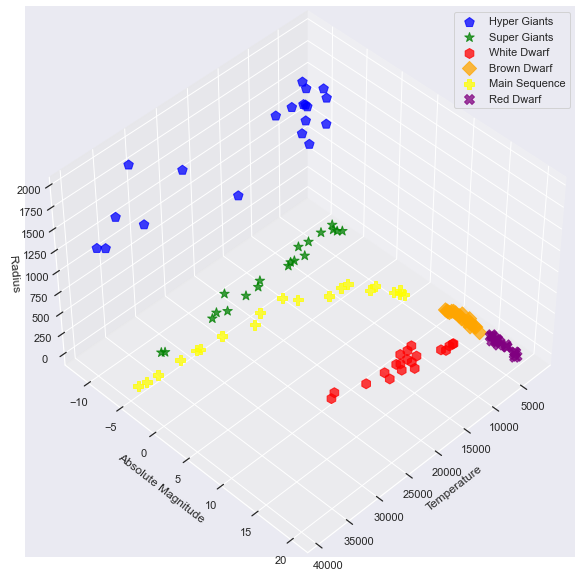

In [35]:
sns.set_context('notebook')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')


for star, marker, color in zip(star_names, markers, marker_color):
    temp = train[train['star_type_name'] == star]
    
    ax.scatter(xs=temp["temperature"],
               ys=temp["absolute_magnitude"],
               zs=temp["radius"],
               c=color,
               s=100,
               alpha=.75,
               marker=marker)
    
ax.set_xlabel('Temperature')
ax.set_ylabel('Absolute Magnitude')
ax.set_zlabel('Radius')
ax.view_init(45,45)

plt.legend(star_names)
plt.tight_layout()
plt.show()

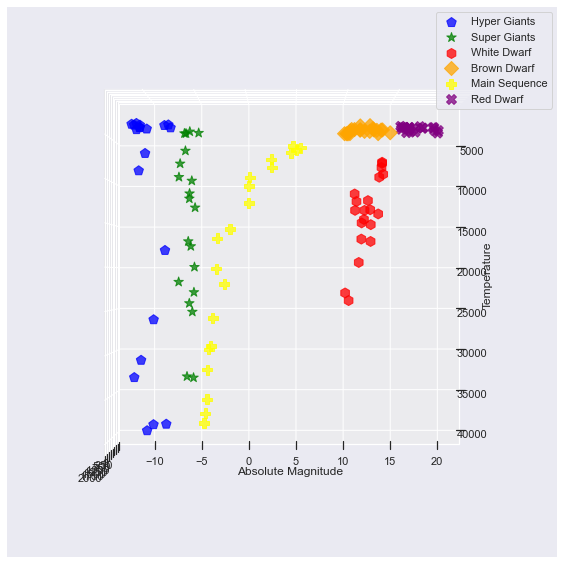

In [36]:
sns.set_context('notebook')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')


for star, marker, color in zip(star_names, markers, marker_color):
    temp = train[train['star_type_name'] == star]
    
    ax.scatter(xs=temp["temperature"],
               ys=temp["absolute_magnitude"],
               zs=temp["radius"],
               c=color,
               s=100,
               alpha=.75,
               marker=marker)
    
ax.set_xlabel('Temperature')
ax.set_ylabel('Absolute Magnitude')
ax.set_zlabel('')
ax.view_init(90,0)

plt.legend(star_names)
plt.tight_layout()
plt.show()

## Visualizing the Distribution of Values across Star Types: Boxplots

In [37]:
boxplot_column_names = list(train.select_dtypes(include='number').columns)
boxplot_column_names.remove('star_type')
boxplot_column_names.remove('spectral_class_num')
boxplot_column_names.remove('color_num')

# Create a variable to store the name of the target variable.
TARGET = 'star_type'

In [38]:
fmt_column_names = [column.replace('_', ' ').title() for column in boxplot_column_names]
fmt_target_name = TARGET.replace('_', ' ').title()

In [39]:
for i, (col_name, fmt_col_name) in enumerate(zip(boxplot_column_names, fmt_column_names)):
    print(i, col_name, fmt_col_name)

0 temperature Temperature
1 luminosity Luminosity
2 radius Radius
3 absolute_magnitude Absolute Magnitude


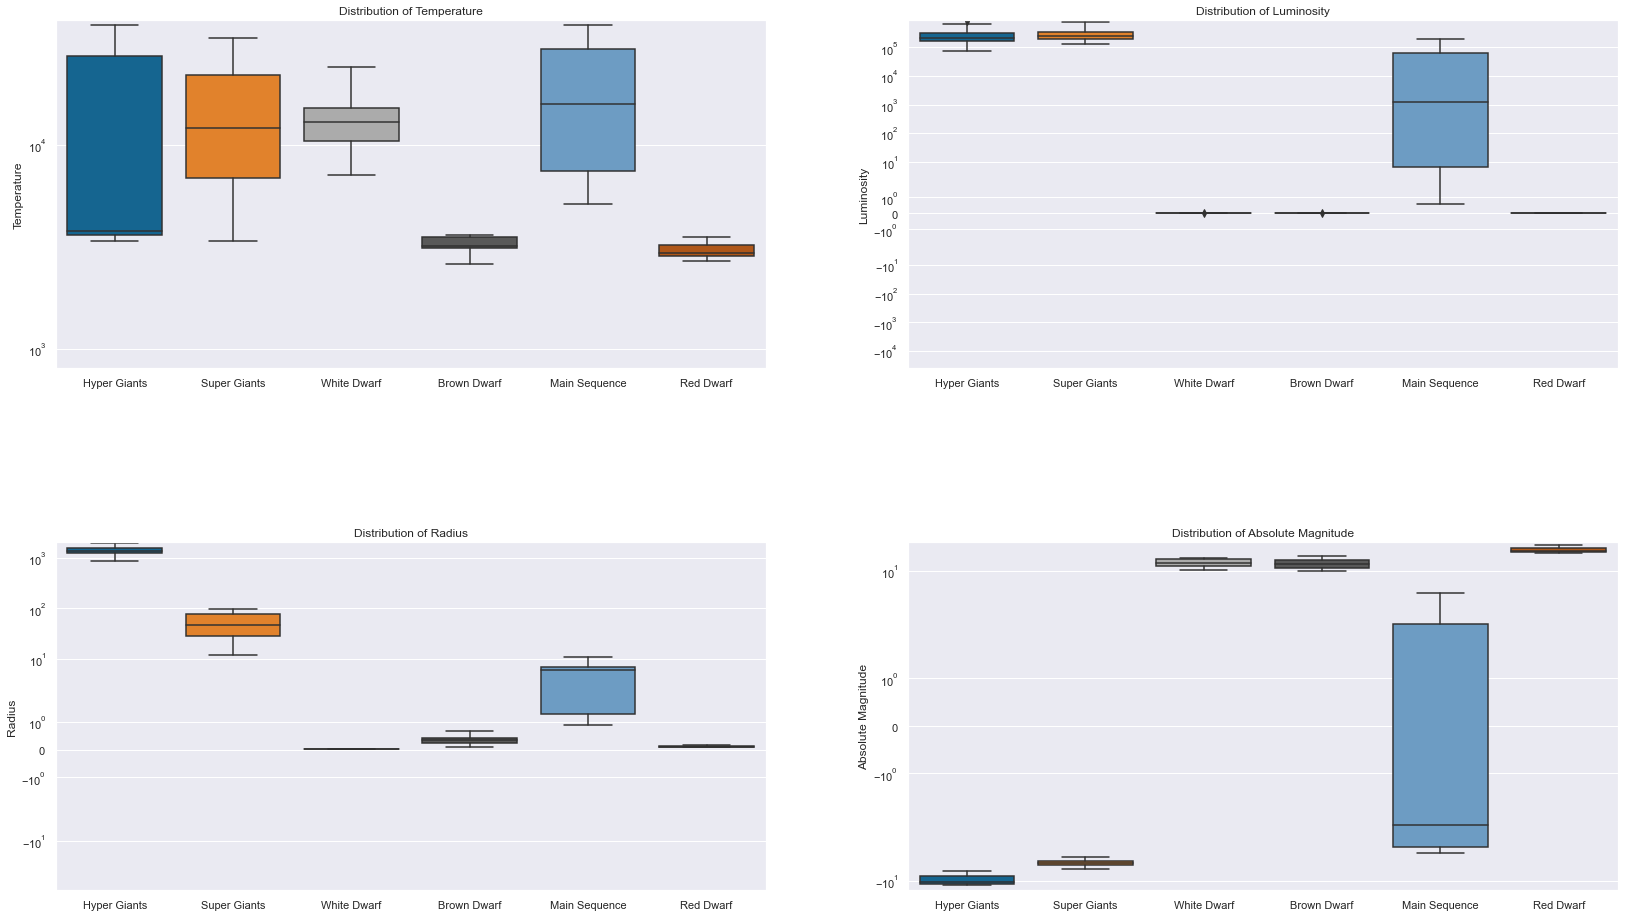

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(28, 16))

axs = axs.ravel()

with sns.axes_style("white"):
    plt.style.use('tableau-colorblind10')
    for i, (col_name, fmt_col_name) in enumerate(zip(boxplot_column_names, fmt_column_names)):
        sns.boxplot(ax=axs[i],
                    x=train['star_type_name'],
                    y=train[col_name],
                    whis=3)

        axs[i].set_title(f'Distribution of {fmt_col_name}')
        axs[i].xaxis.set_label_text('')
        axs[i].yaxis.set_label_text(fmt_col_name)
        
        axs[i].set_yscale('symlog')
        
plt.subplots_adjust(hspace=.5)

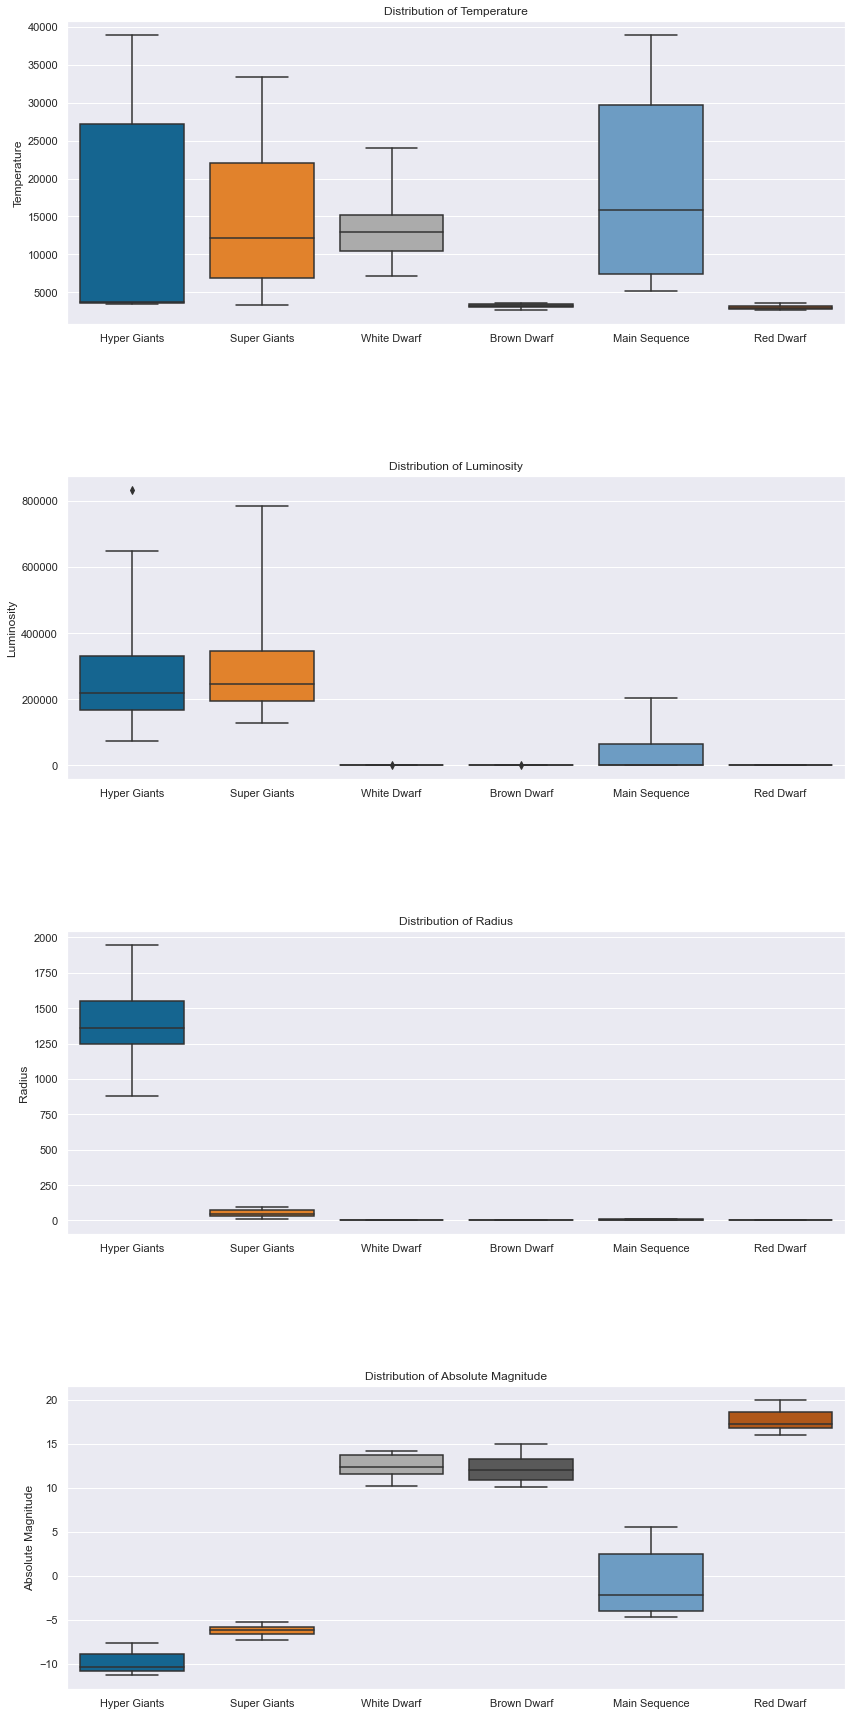

In [41]:
fig, axs = plt.subplots(4, 1, figsize=(12, 24))

axs = axs.ravel()

with sns.axes_style("white"):
    plt.style.use('tableau-colorblind10')
    for i, (col_name, fmt_col_name) in enumerate(zip(boxplot_column_names, fmt_column_names)):
        sns.boxplot(ax=axs[i],
                    x=train['star_type_name'],
                    y=train[col_name],
                    whis=3)

        axs[i].set_title(f'Distribution of {fmt_col_name}')
        axs[i].xaxis.set_label_text('')
        axs[i].yaxis.set_label_text(fmt_col_name)

    plt.tight_layout()
plt.subplots_adjust(hspace=.5)

## Categorical Features

In [42]:
star_color_ctb = pd.crosstab(train['star_type_name'], train['color'])
star_spectral_class_ctb = pd.crosstab(train['star_type_name'], train['spectral_class'])
color_spectral_class_ctb = pd.crosstab(train['color'], train['spectral_class'])

cbar_format = {'ticks':list(np.arange(0, 21, 5))}

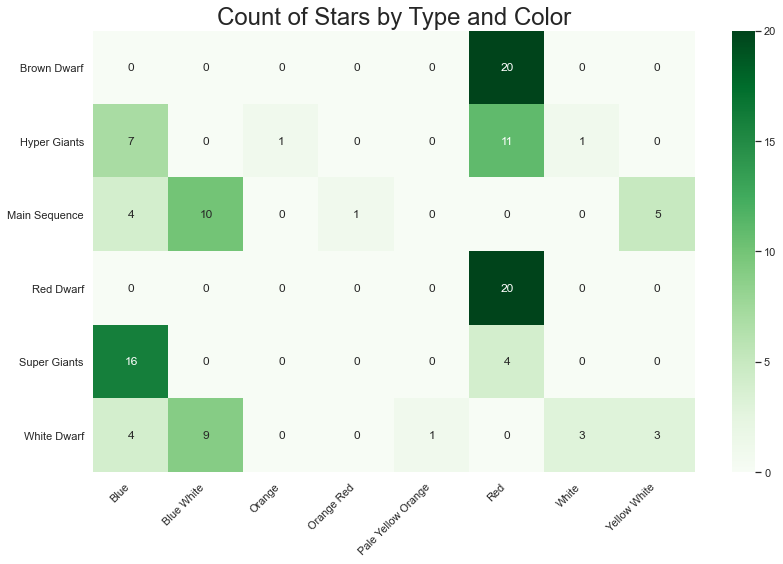

In [43]:
plt.figure(figsize=(12, 8))

sns.heatmap(star_color_ctb,
            cmap='Greens',
            annot=True,
            cbar_kws=cbar_format)

plt.title('Count of Stars by Type and Color', fontsize=24)
plt.xlabel('')
plt.ylabel('')

plt.xticks(ticks=np.arange(.5, len(star_color_ctb.columns)+.5),
           labels=[label.title() for label in list(star_color_ctb.columns)],
           ha='right',
           rotation=45)

plt.tight_layout()
plt.show()

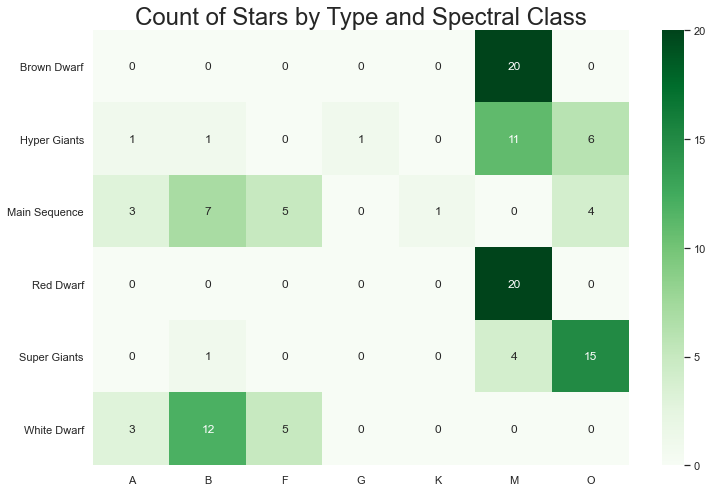

In [44]:
plt.figure(figsize=(12, 8))

sns.heatmap(star_spectral_class_ctb,
            cmap='Greens',
            annot=True,
            cbar_kws=cbar_format)

plt.title('Count of Stars by Type and Spectral Class', fontsize=24)
plt.xlabel('')
plt.ylabel('')

plt.show()

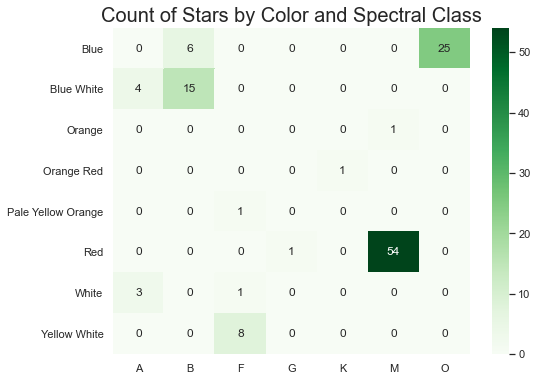

In [45]:
plt.figure(figsize=(8, 6))

sns.heatmap(color_spectral_class_ctb,
            cmap='Greens',
            annot=True)

plt.title('Count of Stars by Color and Spectral Class', fontsize=20)
plt.xlabel('')
plt.ylabel('')

plt.yticks(ticks=np.arange(.5, len(color_spectral_class_ctb.index)+.5),
           labels=[label.title() for label in list(star_color_ctb.columns)],
           ha='right')

plt.show()

## Hypothesis Testing

## Exploration Summary

# Model

1. Preprocessing: Split datasets into feature and target
1. Create a baseline model
1. Create a model
1. Compare model with the baseline

### Preprocessing

In [46]:
# Create a list of nonnumeric columns to remove from the dataset.
columns_to_drop = list(train.select_dtypes(exclude='number').columns)
columns_to_drop.append(TARGET)

# Create a variable to store the name of the target variable.
TARGET = 'star_type'

# Automate data splitting using python's built-in exec() function.
for dataset in ['train', 'validate', 'test']:
    exec(f'X_{dataset}={dataset}.drop(columns=columns_to_drop)')
    exec(f'y_{dataset}={dataset}[[TARGET]]')

In [47]:
X_train

,temperature,luminosity,radius,absolute_magnitude,spectral_class_num,color_num
236,30839,834042.00000,1194.00000,-10.63,4,5
166,19923,152000.00000,73.00000,-5.69,4,5
29,7230,0.00008,0.01300,14.08,3,4
176,18000,200000.00000,1045.00000,-8.30,4,5
113,3399,117000.00000,1486.00000,-10.92,0,0
...,...,...,...,...,...,...
175,3614,145000.00000,1553.00000,-7.71,0,0
149,12984,0.00088,0.00996,11.23,1,1
191,3257,0.00240,0.46000,10.73,0,0
12,3134,0.00040,0.19600,13.21,0,0


In [48]:
y_train

,star_type
236,5
166,4
29,2
176,5
113,5
...,...
175,5
149,2
191,1
12,1


### Create a Baseline Model

In [49]:
y_train.value_counts()

star_type
0            20
1            20
2            20
3            20
4            20
5            20
dtype: int64

In [50]:
total = y_train.count()[0]
print(total)

120


In [51]:
baseline = 28/total

print(f'The baseline model classifies a star correctly about 1/6 times or {baseline:.0%}.')

The baseline model classifies a star correctly about 1/6 times or 23%.


#### Baseline Observation

### Create a Model

In [52]:
# Create model object
tree = DecisionTreeClassifier(random_state=369)
# Fit the object to the data
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=369)

### Train

In [53]:
# Calculate the accuracy
tree.score(X_train, y_train)

1.0

#### Cross Validation

In [54]:
print('Performing Cross Validation...', end='\n\n')
cross_validation = cross_val_score(DecisionTreeClassifier(),
                                   X_train,
                                   y_train,
                                   cv=10,
                                   n_jobs=-1)

print('Results'.center(17, '-'))
print(f'Lowest Score: {cross_validation.min().round(3)}')
print(f'Highest Score:{cross_validation.max().round(3)}')
print(f'Average Score: {cross_validation.mean().round(3)}')

Performing Cross Validation...

-----Results-----
Lowest Score: 0.917
Highest Score:1.0
Average Score: 0.992


### Validate

In [55]:
tree.score(X_validate, y_validate)

0.9888888888888889

### Test

In [56]:
test_score = tree.score(X_test, y_test)

### Evaluate

In [57]:
y_pred = tree.predict(X_test)

c_matrix = confusion_matrix(y_test, y_pred)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



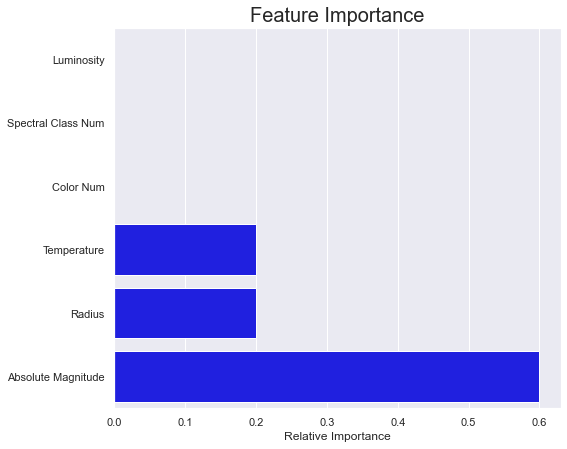

In [59]:
indices = list(np.argsort(tree.feature_importances_))
importances = tree.feature_importances_[indices]

target = list(X_train.columns[indices])
target = [star.replace('_', ' ').title() for star in target]


plt.figure(figsize=(8, 7))
sns.barplot(x=importances,
            y=target,
            orient='h',
            color='blue')

plt.title('Feature Importance', fontsize=20)
plt.xlabel('Relative Importance')
plt.show()

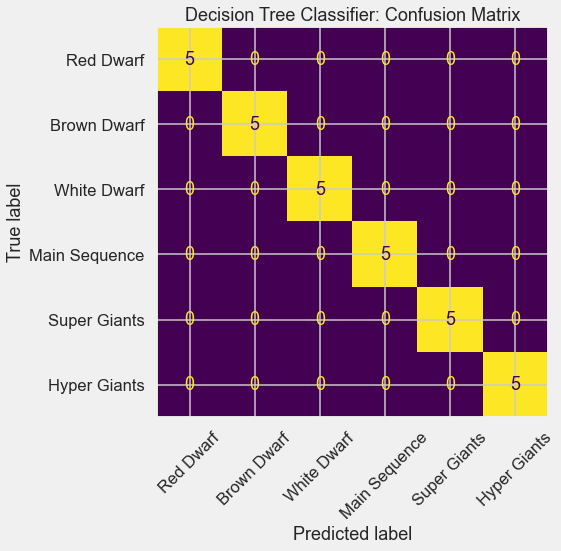

In [60]:
plt.style.use('fivethirtyeight')
sns.set_context('talk')
c_matrix_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=star_type_map.values())

fig, ax = plt.subplots(figsize=(8,8))
c_matrix_display.plot(ax=ax, colorbar=False, xticks_rotation=45)

plt.title('Decision Tree Classifier: Confusion Matrix')
plt.tight_layout()
plt.show()

In [61]:
delta = (test_score/baseline)-1
print(f'{delta:.0%}')

329%


# Conclusions